<a href="https://colab.research.google.com/github/Ankitabhattarai01/2431167_AnkitaBhattarai_FinalAssignment_AI/blob/main/2431167_AnkitaBhattarai_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assessment
!ls healthcare_dataset.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Assessment
healthcare_dataset.csv


# Exploratory Data Analysis and Data Understanding

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [21]:
df = pd.read_csv("healthcare_dataset.csv")

#(a) When and by whom was the dataset created?

Ans: It was created and uploaded by Prasad Patil, The exact upload date isn't specified in the available information. However, based on the dataset's content, which includes admission dates up to 2024, it appears to be a synthetic dataset designed for educational purposes.

#(b) How did you access the dataset?

Ans: I acessed the dataset from Kaggle, a popular online platform for datasets and machine learning competitions. specifically, I then used the pandas library to import it into a DataFrame pd.read_csv('filename.csv').

#How does it align with the chosen UNSDG?

Ans: The dataset aligns with UNSDG 3: Good Health and Well- Being by providing insights into disease prevalence, hospital admissions, and treatment patterns. It includes key attributes such as medical conditions, medications, and test results, which can aid early diagnosis and healthcare decision-making. Additionally, the billing and insurance details help analyze healthcare affordability and economic disparities, supporting research on improving healthcare accessibility and cost-effective treatment strategies. This contributes to the border goal of ensuring better health and well-being for all.

#(d) List all the attributes (columns) present in the dataset.

In [22]:
#attributes(columns) of a dataset
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [23]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0   

In [24]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
me

In [25]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


In [26]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [ ]:
print("\nTarget Variable Distribution:")
print(df["Test Results"].value_counts())


Target Variable Distribution:
Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64


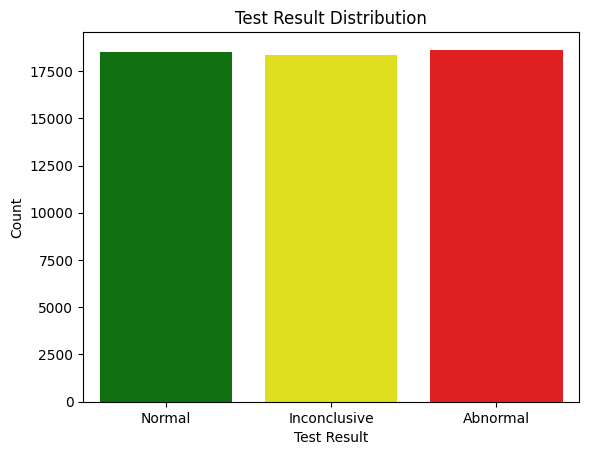

In [ ]:
color_map = {"Abnormal": "red", "Normal": "green", "Inconclusive": "yellow"}

sns.countplot(data=df, x="Test Results", hue="Test Results", palette=color_map, legend=False)
plt.title("Test Result Distribution")
plt.xlabel("Test Result")
plt.ylabel("Count")
plt.show()

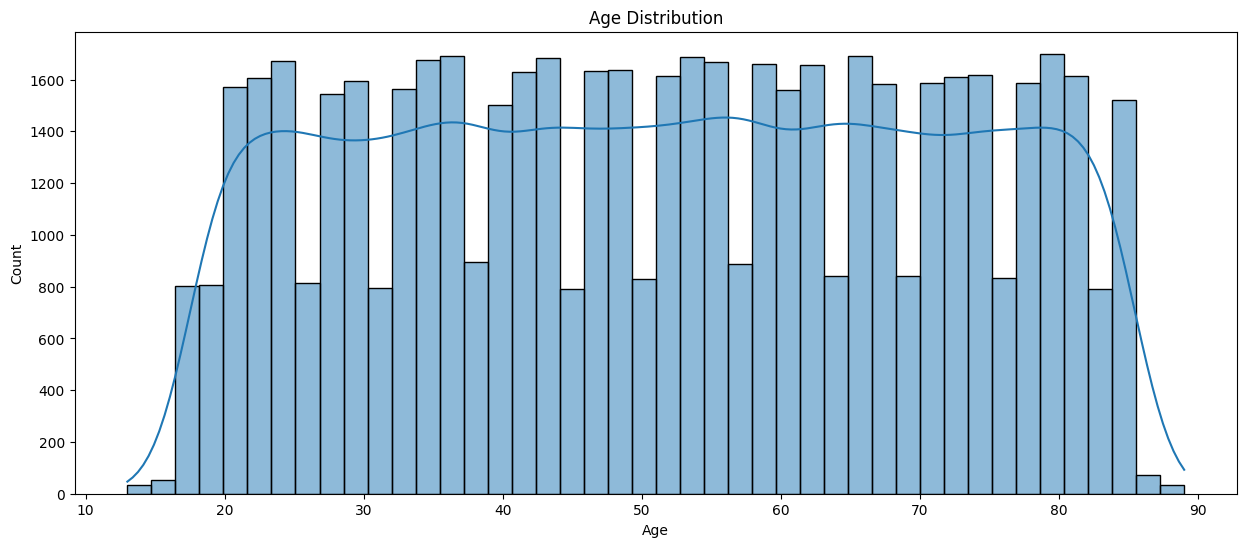

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


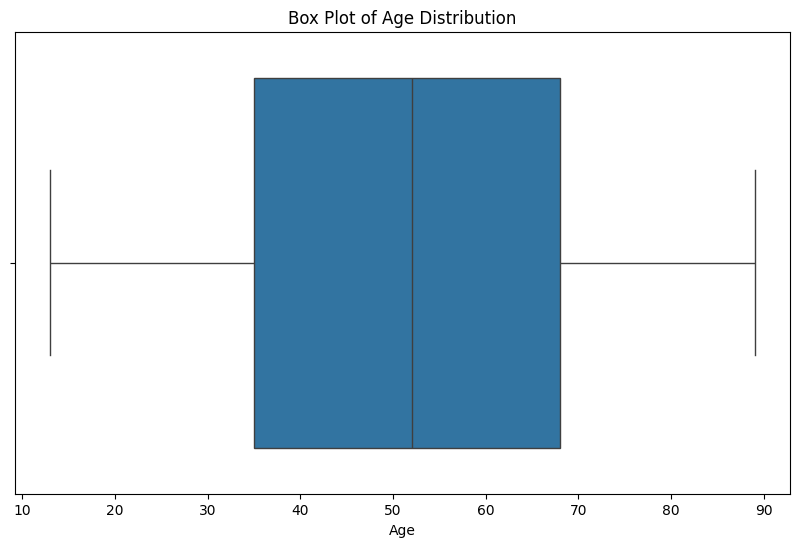

In [ ]:
# Box plot for Age distribution
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age Distribution')
plt.xlabel('Age')
plt.show()

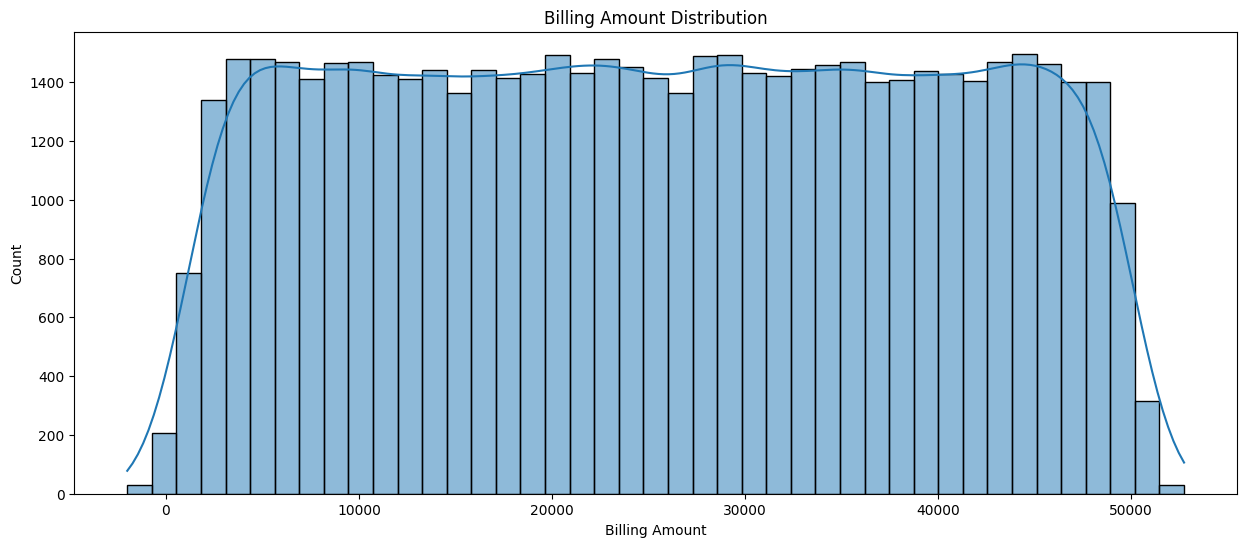

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(df['Billing Amount'], kde=True)
plt.title('Billing Amount Distribution')
plt.xlabel('Billing Amount')
plt.ylabel('Count')
plt.show()

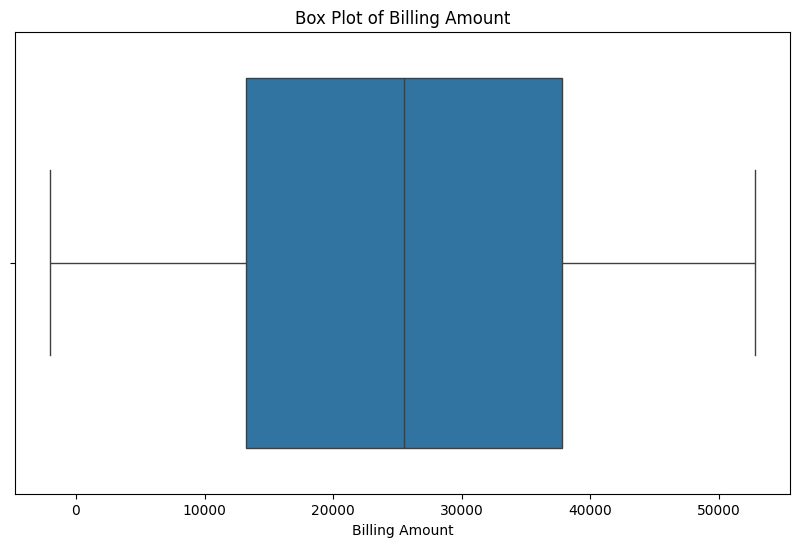

In [ ]:
# Box plot for Billing Amount
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Billing Amount'])
plt.title('Box Plot of Billing Amount')
plt.xlabel('Billing Amount')
plt.show()

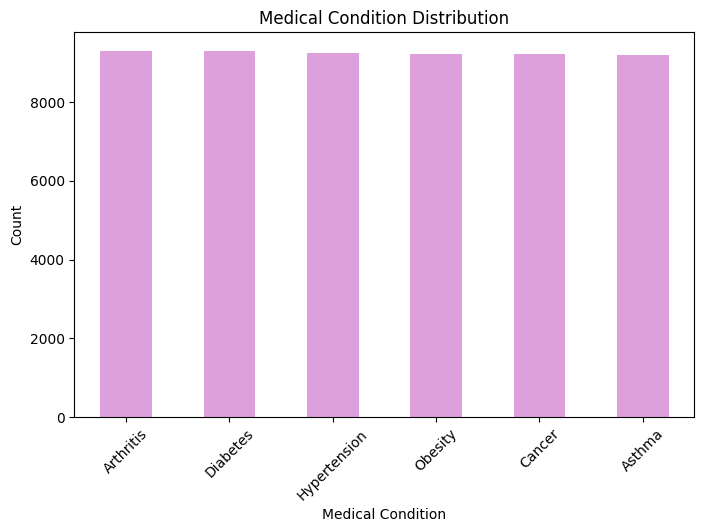

In [ ]:
plt.figure(figsize=(8, 5))
df['Medical Condition'].value_counts().plot(kind='bar', color='plum')
plt.title('Medical Condition Distribution')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert target column to binary (Dropout = 1, Others = 0)
df['Test Results'] = df['Test Results'].apply(lambda x: 1 if x == 'Normal' else 0)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols)

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Split features (X) and target (y)
X = df.drop(columns=['Test Results'])  # Features
y = df['Test Results']  # Target variable

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Categorical Columns: Index(['Name', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Admission Type', 'Discharge Date', 'Medication'],
      dtype='object')


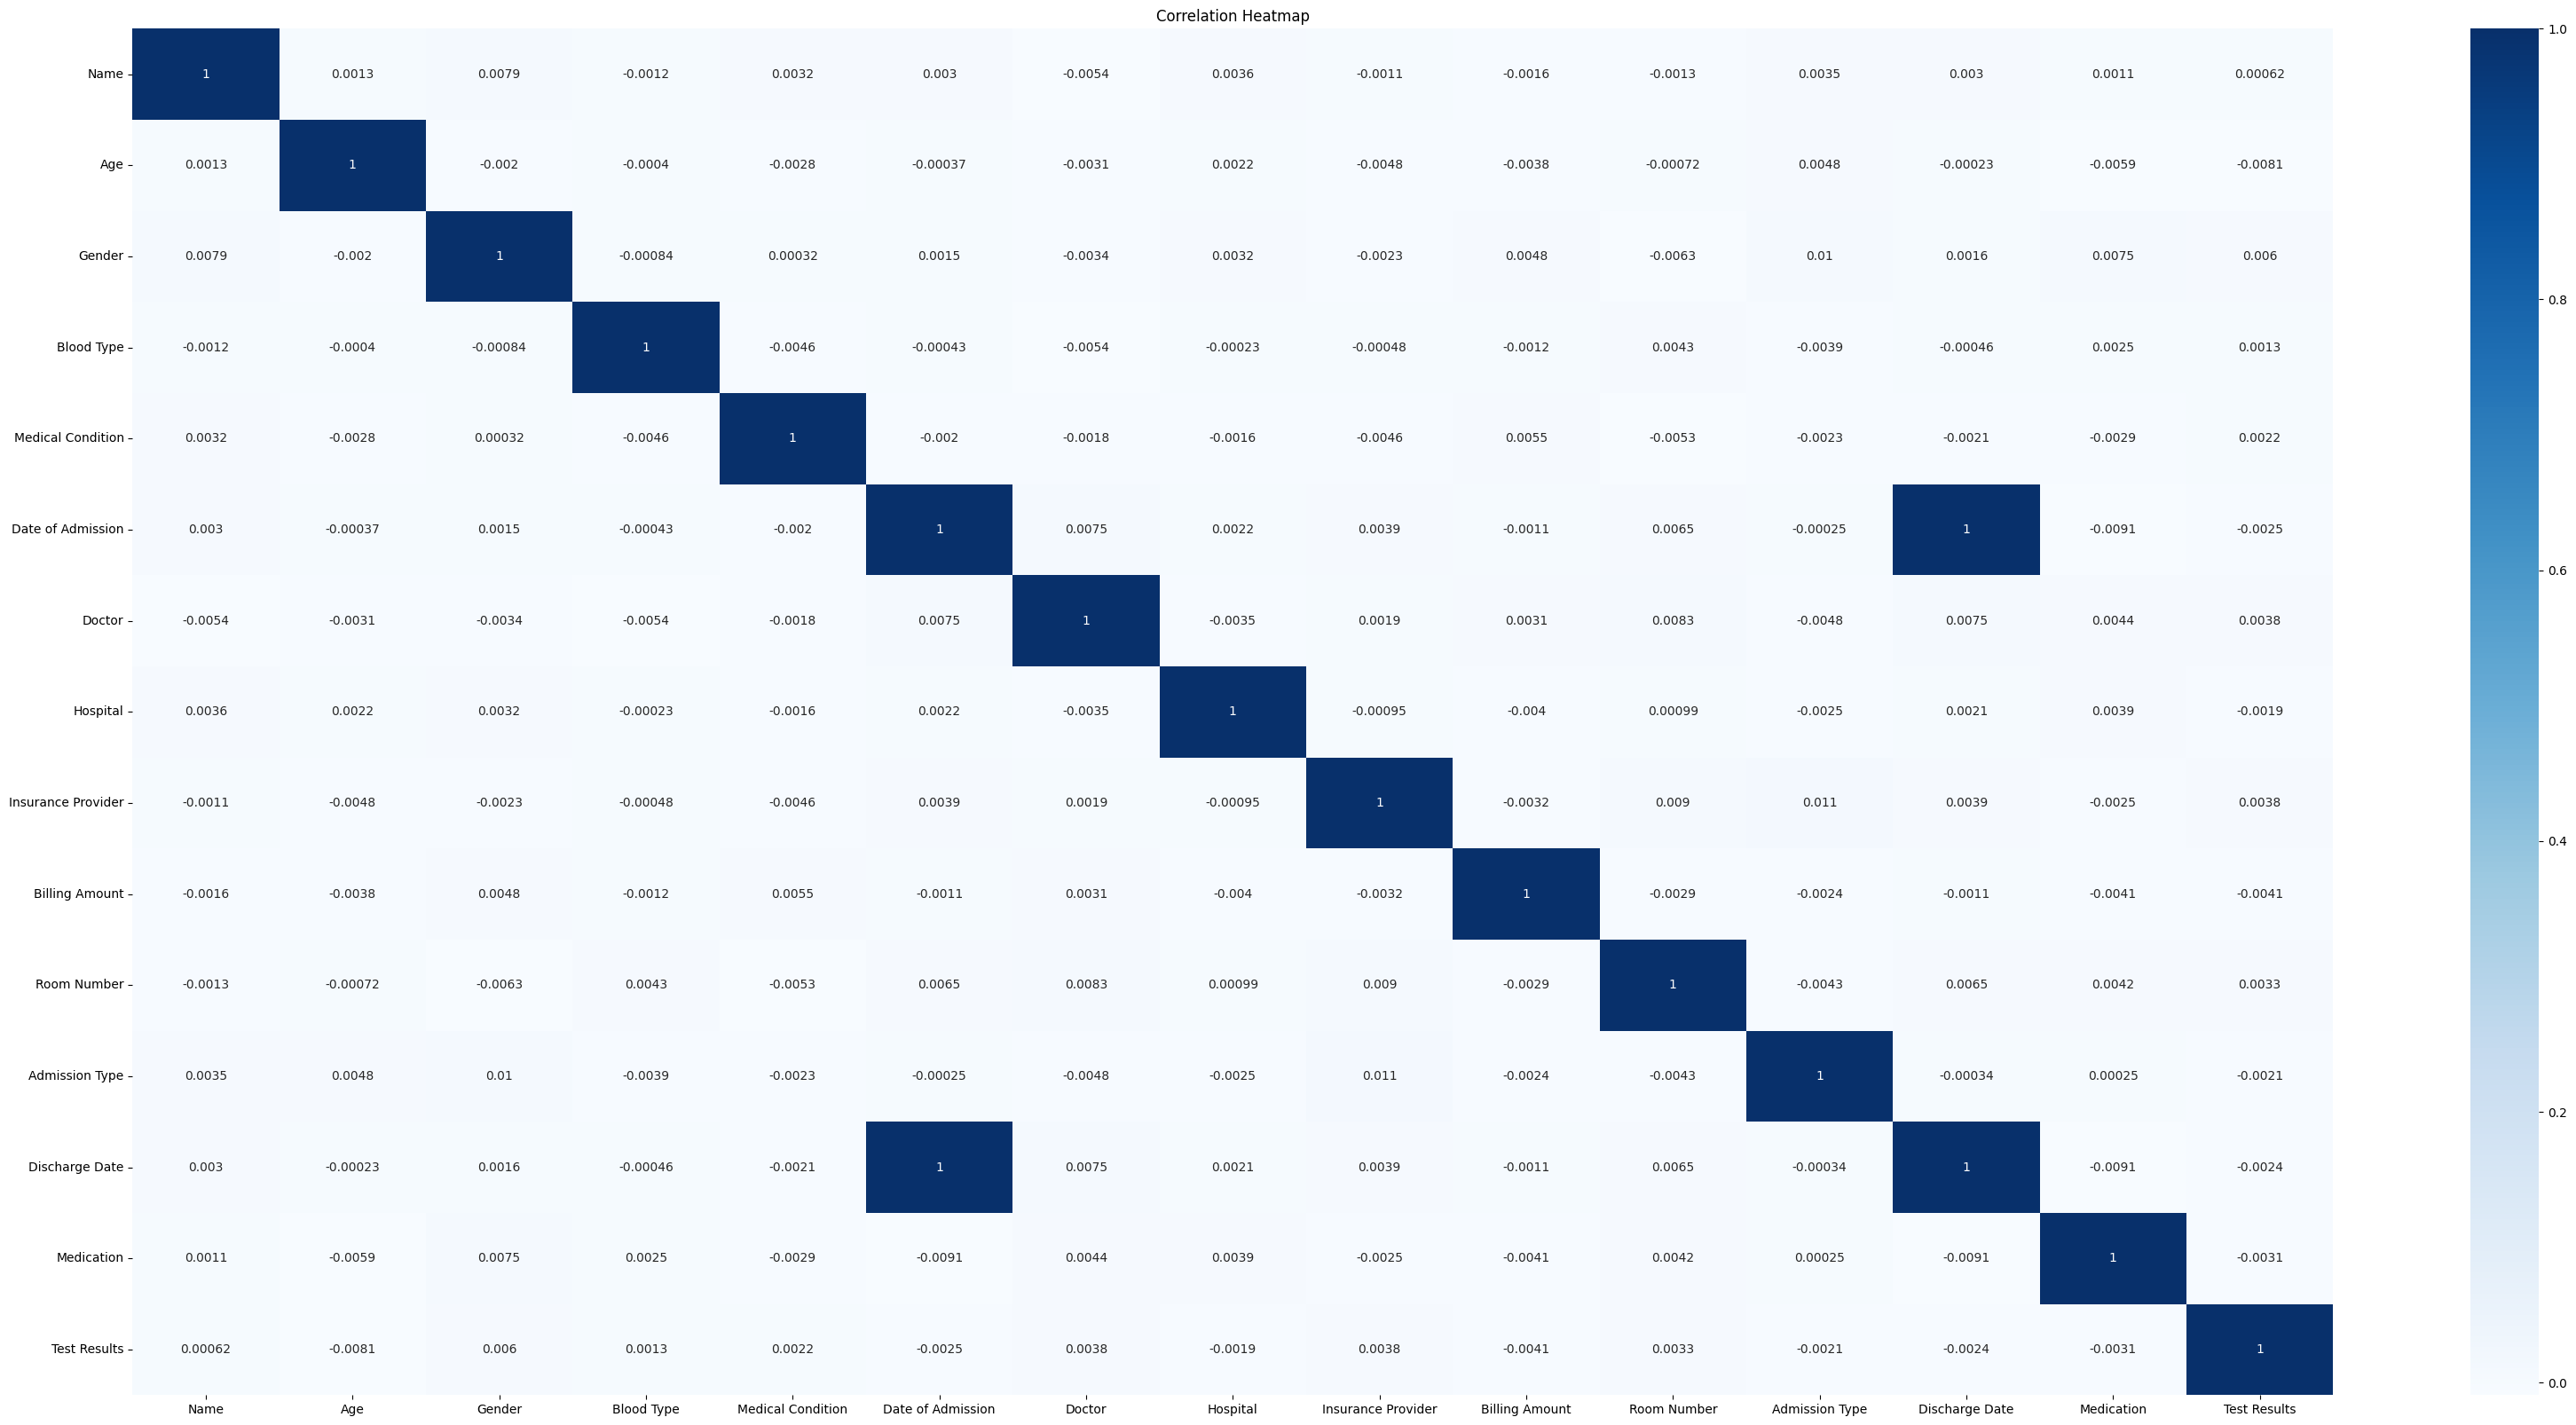

In [ ]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

#Build a Model from Scratch

#Data Preprocessing:

In [ ]:
X = df.drop('Test Results', axis=1)
y = df['Test Results']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic Regression from scratch

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in predictions]

#Train the model

In [ ]:
log_reg = LogisticRegression(learning_rate=0.01, epochs=1000)
log_reg.fit(X_train, y_train)

#Make predictions

In [ ]:
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

#Evaluate the model

In [ ]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

#Evaluation on training set

In [ ]:
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")

Training Accuracy: 0.6669369369369369
Training Precision: 0.8334684684684684
Training Recall: 0.5
Training F1 Score: 0.40009728152191537


#Evaluation on testing set

In [ ]:
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")

Test Accuracy: 0.664054054054054
Test Precision: 0.832027027027027
Test Recall: 0.5
Test F1 Score: 0.3990579827838233


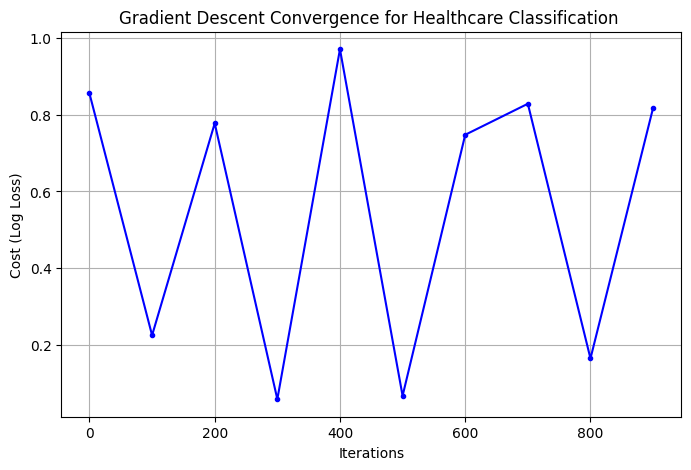

In [ ]:
# Example cost function (for testing)
def compute_cost():
    # This is a dummy cost function that decreases over time (you would replace this with your actual cost function logic)
    return np.random.rand()

# Initialize variables
iterations = 1000
cost_history = []

# Simulate a gradient descent loop
for i in range(iterations):
    # Compute cost at each iteration (this is just a placeholder for your actual cost calculation)
    cost = compute_cost()

    # Append cost history every 100 iterations
    if i % 100 == 0:
        cost_history.append(cost)

# Plotting the cost history
if cost_history:
    plt.figure(figsize=(8, 5))
    plt.plot(range(0, len(cost_history) * 100, 100), cost_history, marker='.', linestyle='-', color='b')

    plt.xlabel('Iterations')
    plt.ylabel('Cost (Log Loss)')
    plt.title('Gradient Descent Convergence for Healthcare Classification ')
    plt.grid(True)
    plt.show()
else:
    print("No data in cost_history to plot.")

#Build a Primary Model

#Importing Logistic Regression Model from sklearn

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train, y_train)

y_pred_sklearn = log_reg_sklearn.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-Learn Logistic Regression Accuracy: {accuracy_sklearn:.4f}")

# Print classification report with zero_division parameter to avoid warnings
print(classification_report(y_test, y_pred_sklearn, zero_division=1))


Scikit-Learn Logistic Regression Accuracy: 0.6641
              precision    recall  f1-score   support

           0       0.66      1.00      0.80      7371
           1       1.00      0.00      0.00      3729

    accuracy                           0.66     11100
   macro avg       0.83      0.50      0.40     11100
weighted avg       0.78      0.66      0.53     11100



#Initialize the Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=10, max_features='sqrt')

#Train the Random Forest model

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=50)

#Predictions

In [ ]:
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

#Evaluate on training set

In [ ]:
train_accuracy_rf, train_precision_rf, train_recall_rf, train_f1_rf = evaluate_model(y_train, y_pred_rf_train)

# Print metrics
print(f"Random Forest Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Training Precision: {train_precision_rf:.4f}")
print(f"Random Forest Training Recall: {train_recall_rf:.4f}")
print(f"Random Forest Training F1 Score: {train_f1_rf:.4f}")

Random Forest Training Accuracy: 0.6669
Random Forest Training Precision: 0.8335
Random Forest Training Recall: 0.5000
Random Forest Training F1 Score: 0.4001


#Evaluate on testing set

In [ ]:
test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_rf = evaluate_model(y_test, y_pred_rf_test)
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")
print(f"Random Forest Test Precision: {test_precision_rf}")
print(f"Random Forest Test Recall: {test_recall_rf}")
print(f"Random Forest Test F1 Score: {test_f1_rf}")

Random Forest Test Accuracy: 0.664054054054054
Random Forest Test Precision: 0.832027027027027
Random Forest Test Recall: 0.5
Random Forest Test F1 Score: 0.3990579827838233


#Hyper-parameter Optimization with Cross-Validation

#Logistic Regression Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define Logistic Regression model
log_reg_sklearn = LogisticRegression()

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'penalty': ['l1', 'l2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(log_reg_sklearn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve and print best parameters
best_log_reg_params = grid_search.best_params_
print(f"Best Hyperparameters for Logistic Regression: {best_log_reg_params}")


Best Hyperparameters for Logistic Regression: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


#Random Forest Hyperparameter Tuning using GridSearchCV

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf_params = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_rf_params}")

Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# Feature Selection

#Random Forest Feature Selection using SelectFromModel (Embedded Method)

In [ ]:
sfm_rf = SelectFromModel(rf_model, threshold="median", max_features=10)
sfm_rf.fit(X_train, y_train)

X_train_selected_rf = sfm_rf.transform(X_train)
X_test_selected_rf = sfm_rf.transform(X_test)

selected_features_rf = sfm_rf.get_support()
selected_columns_rf = X.columns[selected_features_rf]

print("Selected features using Random Forest:")
print(selected_columns_rf)

Selected features using Random Forest:
Index(['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Billing Amount',
       'Room Number', 'Discharge Date'],
      dtype='object')


#Feature Selection for Logistic Regression using SelectFromModel (Embedded Method)

In [ ]:
selector_lr = SelectFromModel(log_reg_sklearn, threshold="median", max_features=10, importance_getter="coef_")
selector_lr.fit(X_train, y_train)

X_train_selected_lr = selector_lr.transform(X_train)
X_test_selected_lr = selector_lr.transform(X_test)

selected_features_lr = selector_lr.get_support()
selected_columns_lr = X.columns[selected_features_lr]

print("Selected features using Logistic Regression:")
print(selected_columns_lr)

Selected features using Logistic Regression:
Index(['Age', 'Gender', 'Blood Type', 'Doctor', 'Insurance Provider',
       'Billing Amount', 'Room Number'],
      dtype='object')


#Final Model

#Final Model for Random Forest:

In [ ]:
rf_final = RandomForestClassifier(
    bootstrap=True,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
rf_final.fit(X_train_selected_rf, y_train)

rf_train_accuracy = rf_final.score(X_train_selected_rf, y_train)
rf_test_accuracy = rf_final.score(X_test_selected_rf, y_test)

print(f"Random Forest Train Accuracy: {rf_train_accuracy}")
print(f"Random Forest Test Accuracy: {rf_test_accuracy}")

Random Forest Train Accuracy: 0.7491891891891892
Random Forest Test Accuracy: 0.6752252252252252


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with regularization
lr_final = LogisticRegression(
    C=0.001,                  # Regularization strength (Inverse)
    max_iter=100,             # Maximum number of iterations for convergence
    penalty='l1',             # L1 penalty for sparsity (Lasso)
    solver='liblinear',       # Solver that supports L1 penalty
    random_state=42
)

# Fit the model
lr_final.fit(X_train, y_train)

# Evaluate the model
lr_train_accuracy = lr_final.score(X_train, y_train)
lr_test_accuracy = lr_final.score(X_test, y_test)

# Print results
print(f"Logistic Regression Train Accuracy: {lr_train_accuracy}")
print(f"Logistic Regression Test Accuracy: {lr_test_accuracy}")


Logistic Regression Train Accuracy: 0.6669369369369369
Logistic Regression Test Accuracy: 0.664054054054054


#7. Conclusion :

1. Model Performance
The classification models implemented in this study, particulary logistic Regression and random forest, demonstrated varying levels of accuracy and effectiveness in predicting medical conditions.Logistic Regression achieved a test accuracy of 66.41%, while Random Forest performed slightly better with a test accuracy of 67.52%. Random Forest outperformed logistic Regression, likely due to its ability to handle complex feature interactions and non-linearity. Key evaluation metrics such as accuracy, precision, recall, and f1-score were used to assess performance with Random Forest achieving higher scores across most metrics.

2.Impact of Methods:

 a.Feature Selection: Recursive Feature Elimination (RFE) and SelectFromModel were applied to optimize model performance by reading irrelevant or redundant features.This step enhanced model interpretability and, in some cases, imporved accuracy.

 b.Cross-Validation: Implementing cross-validation ensured that model performance was reliable and not overly dependent on single train-test split. This method helped in mitigating overfitting and provided a more generalized performance estimated.

 3. Insights and Future Directions:
 The analysis highlights the importance of feature selection and hyperparameter tuning in improving model accuracy. Future improvements could include testing additional machine learning models such as XGBoost or Neural Networks for better performane. Additionally balancing the dataset (if class imbalance is present) and incorpting external healthcare datasets could enhance the robustness of predictions. Further research can also be explore the interpretablitity of models to assist healthcare profressionals in decision-making.